# Loan Prediction


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 

### Importing & Loading the dataset

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


### Dataset Info:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


### Dataset Shape:

In [4]:
df.shape

(614, 13)

## Data Cleaning

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [7]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

In [8]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

### Now, Let's drop all the missing values remaining.

In [9]:
df.dropna(inplace=True)

### Let's check the Missing values for the final time!

In [10]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Here, we have dropped all the missing values to avoid disturbances in the model. The Loan Prediction requires all the details to work efficiently and thus the missing values are dropped.

### Now, Let's check the final Dataset Shape

In [11]:
df.shape

(542, 13)

### Exploratory Data Analyis

#### Comparison between Parameters in getting the Loan:

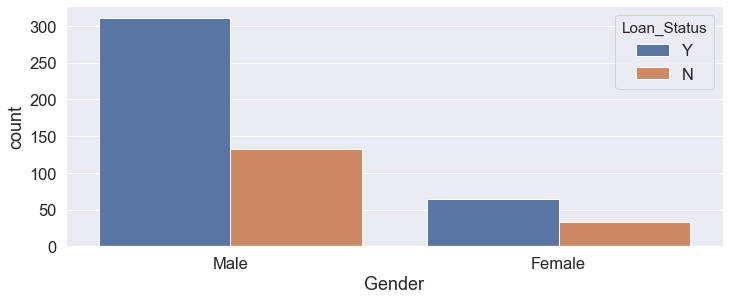

In [12]:
plt.figure(figsize = (40, 15))
sns.set(font_scale = 1.5)
plt.subplot(331)
sns.countplot(df['Gender'],hue=df['Loan_Status'])

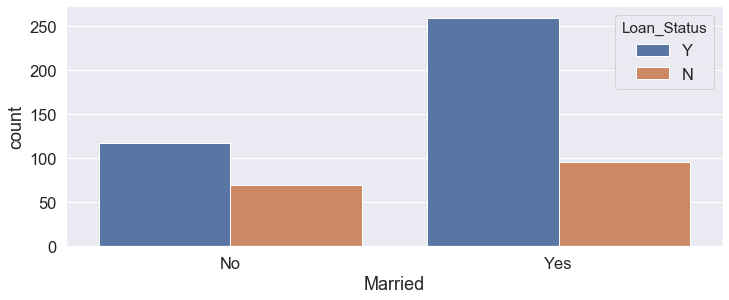

In [13]:
plt.figure(figsize = (40, 15))
sns.set(font_scale = 1.5)
plt.subplot(332)
sns.countplot(df['Married'],hue=df['Loan_Status'])


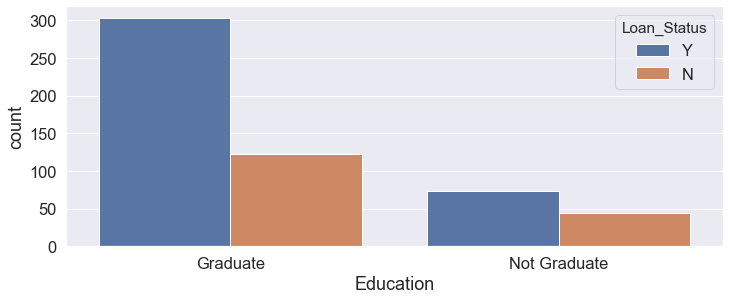

In [14]:
plt.figure(figsize = (40, 15))
sns.set(font_scale = 1.5)
plt.subplot(333)
sns.countplot(df['Education'],hue=df['Loan_Status'])


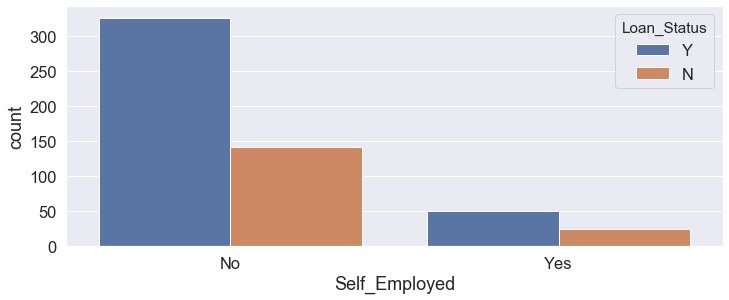

In [15]:
plt.figure(figsize = (40, 15))
sns.set(font_scale = 1.5)
plt.subplot(334)
sns.countplot(df['Self_Employed'],hue=df['Loan_Status'])


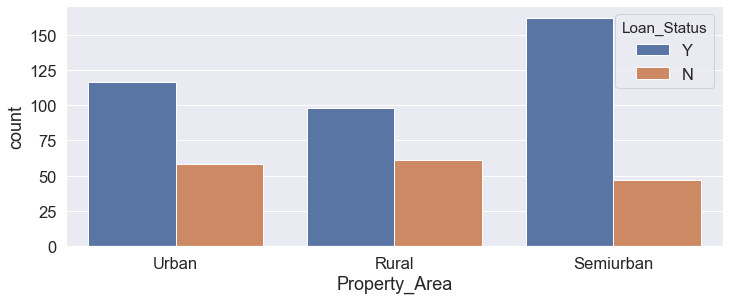

In [16]:
plt.figure(figsize = (40, 15))
sns.set(font_scale = 1.5)
plt.subplot(335)
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])


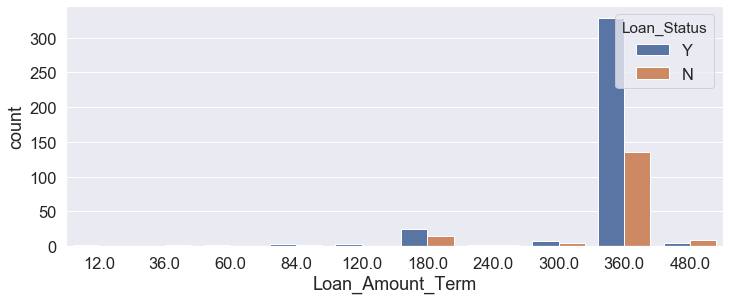

In [17]:
plt.figure(figsize = (40, 15))
sns.set(font_scale = 1.5)
plt.subplot(335)
sns.countplot(df['Loan_Amount_Term'],hue=df['Loan_Status'])


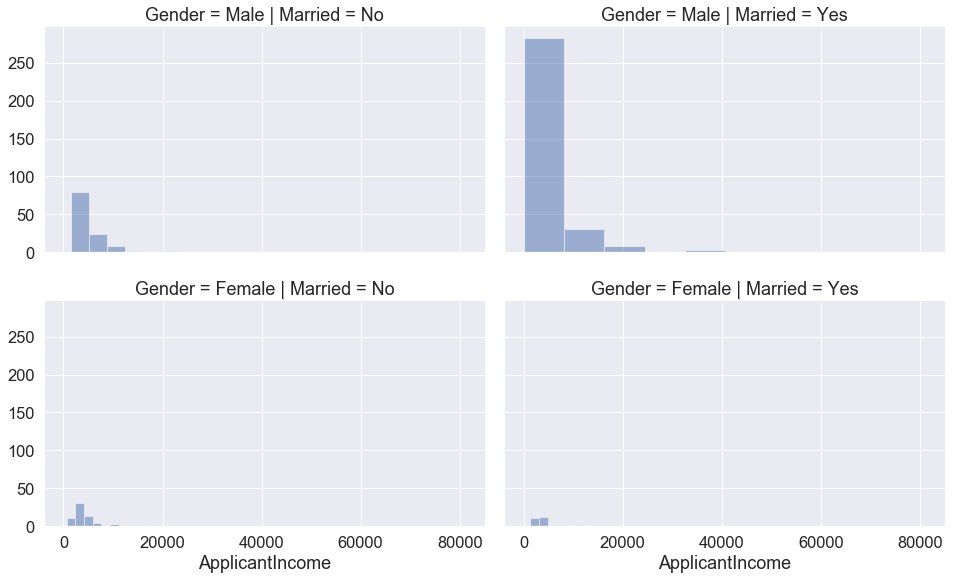

In [18]:
grid  = sns.FacetGrid(df, row='Gender', col='Married', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

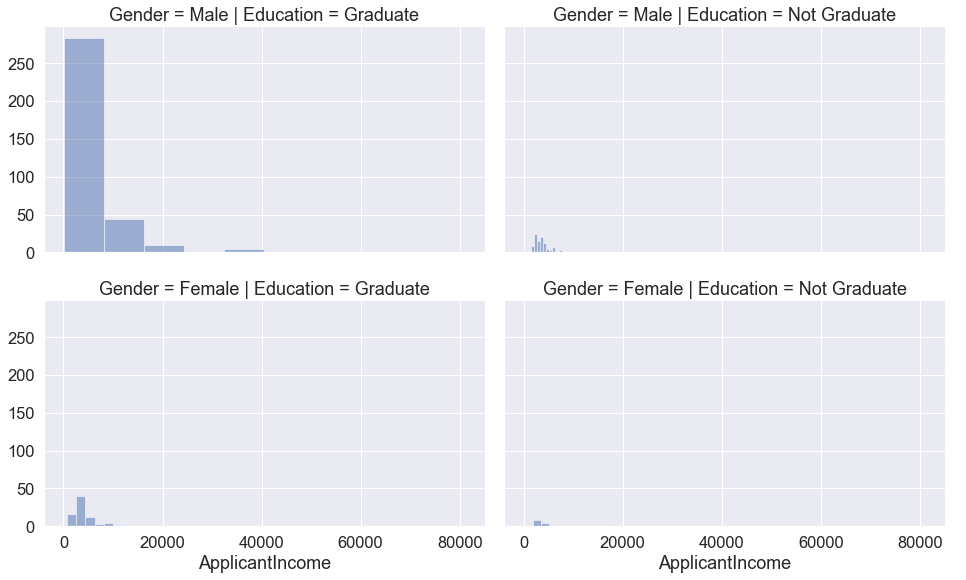

In [19]:
grid  = sns.FacetGrid(df, row='Gender', col='Education', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

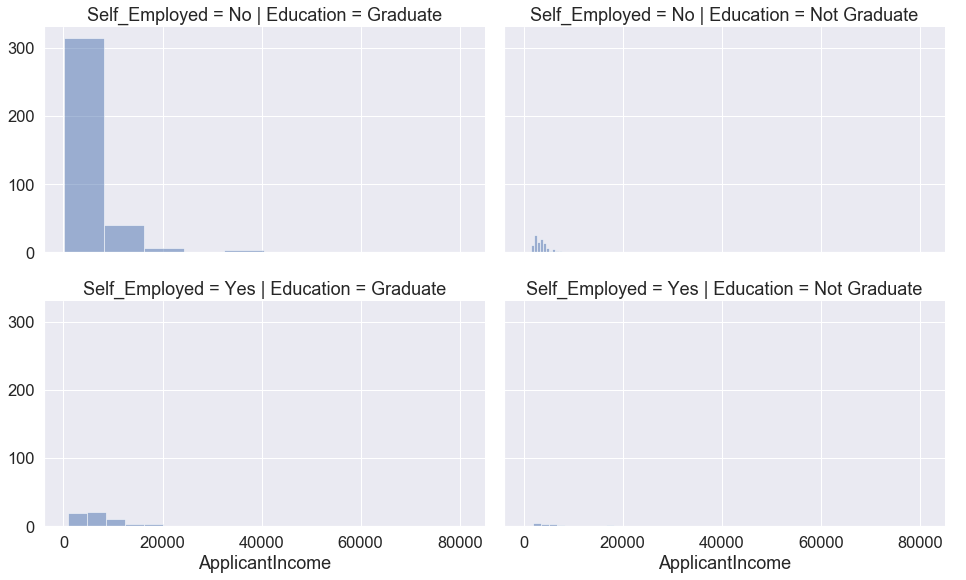

In [20]:
grid  = sns.FacetGrid(df, row='Self_Employed', col='Education', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

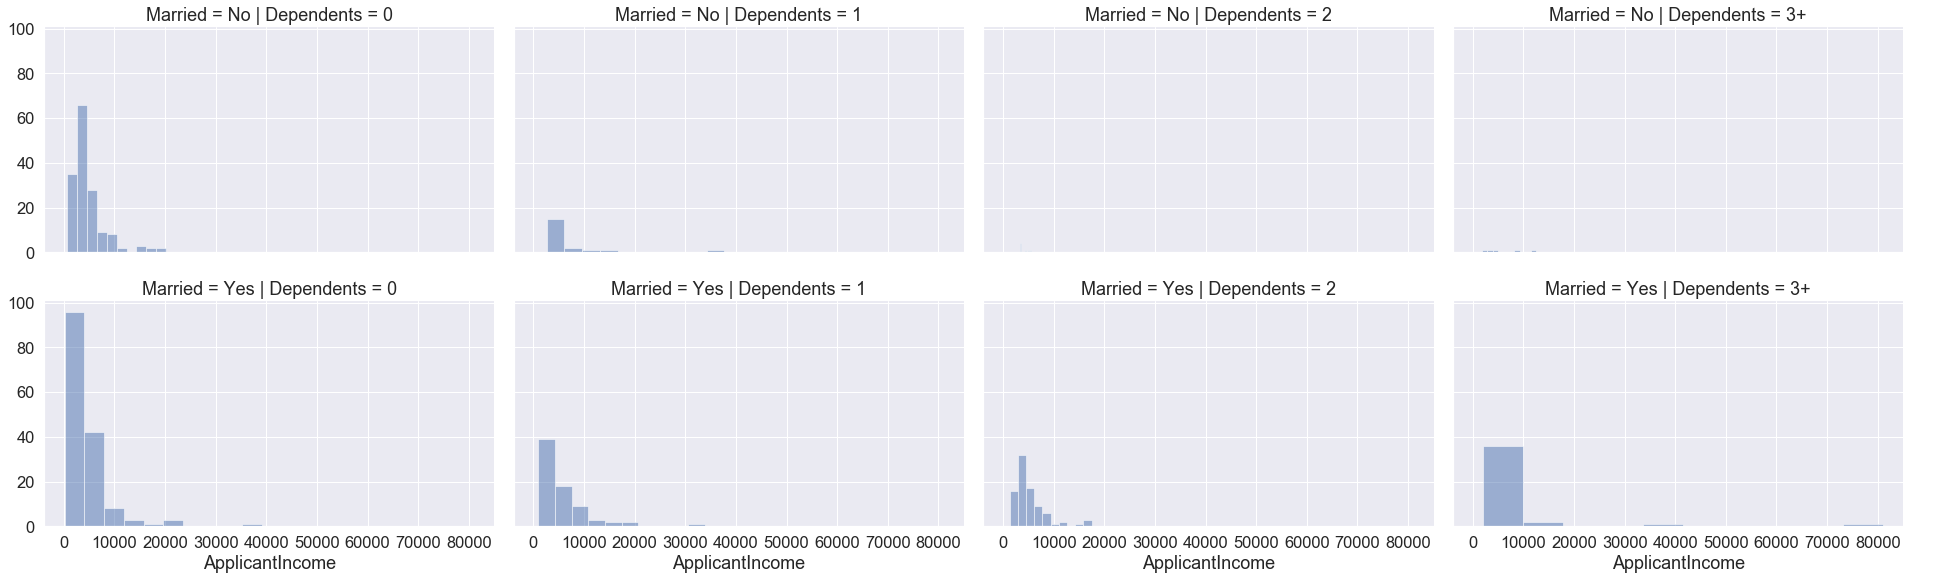

In [21]:
grid  = sns.FacetGrid(df, row='Married', col='Dependents', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

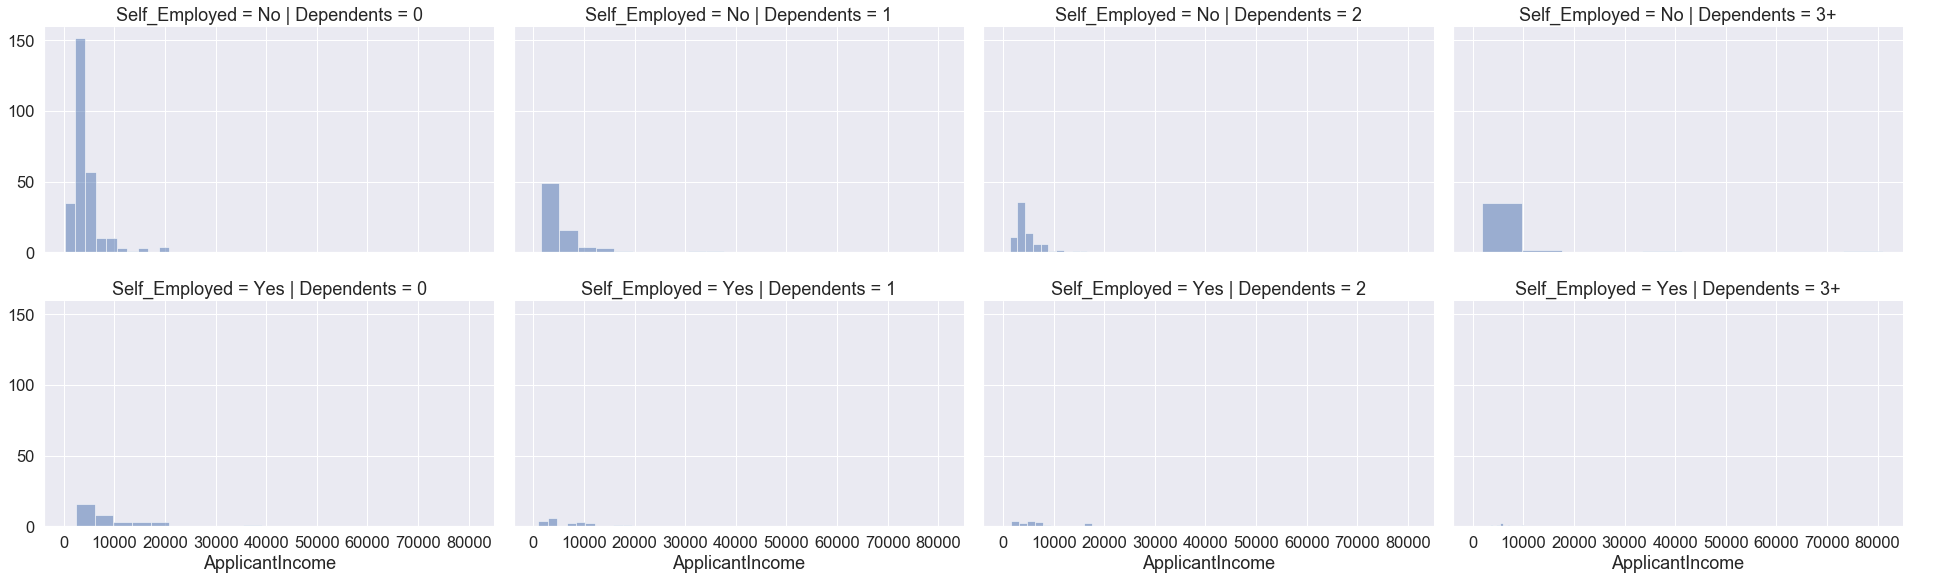

In [22]:
grid  = sns.FacetGrid(df, row='Self_Employed', col='Dependents', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

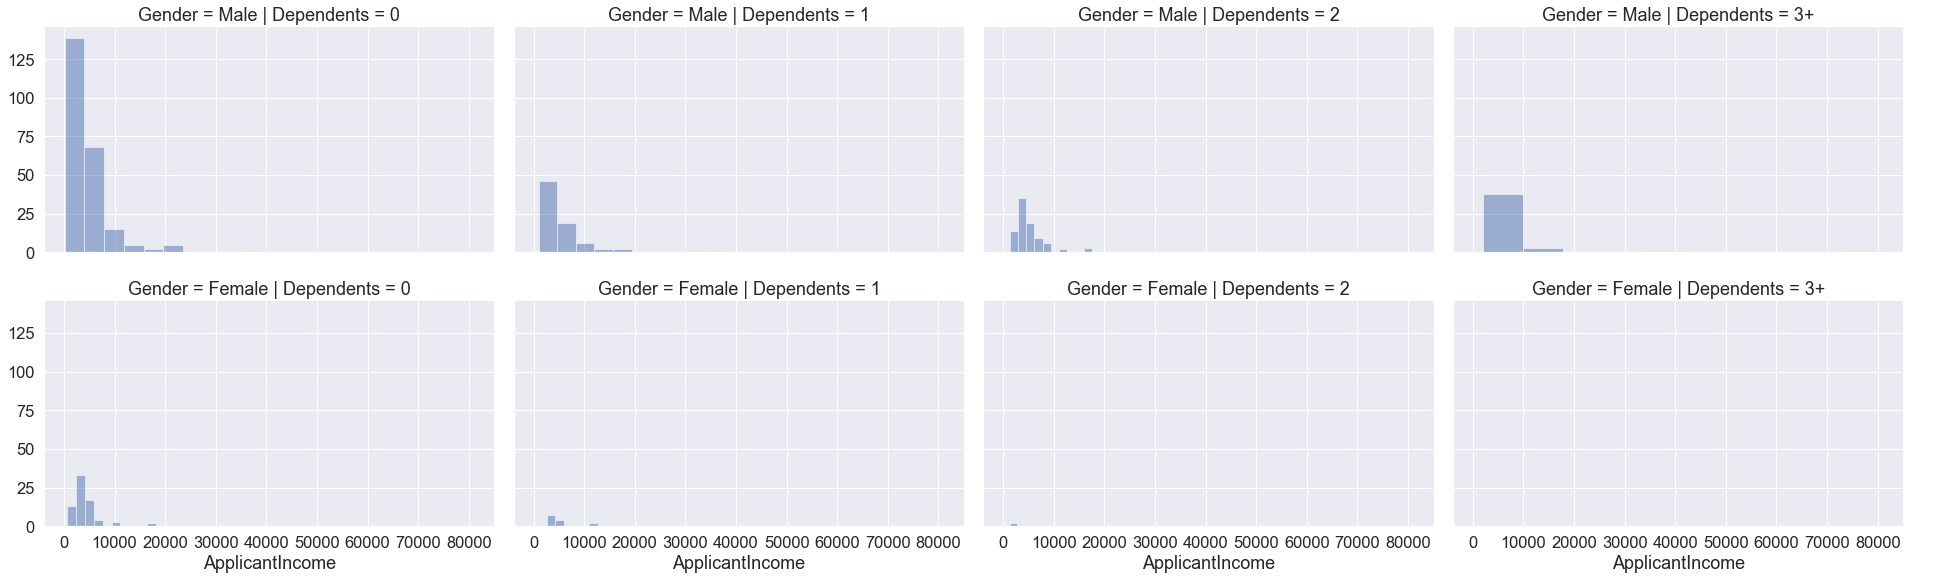

In [23]:
grid  = sns.FacetGrid(df, row='Gender', col='Dependents', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

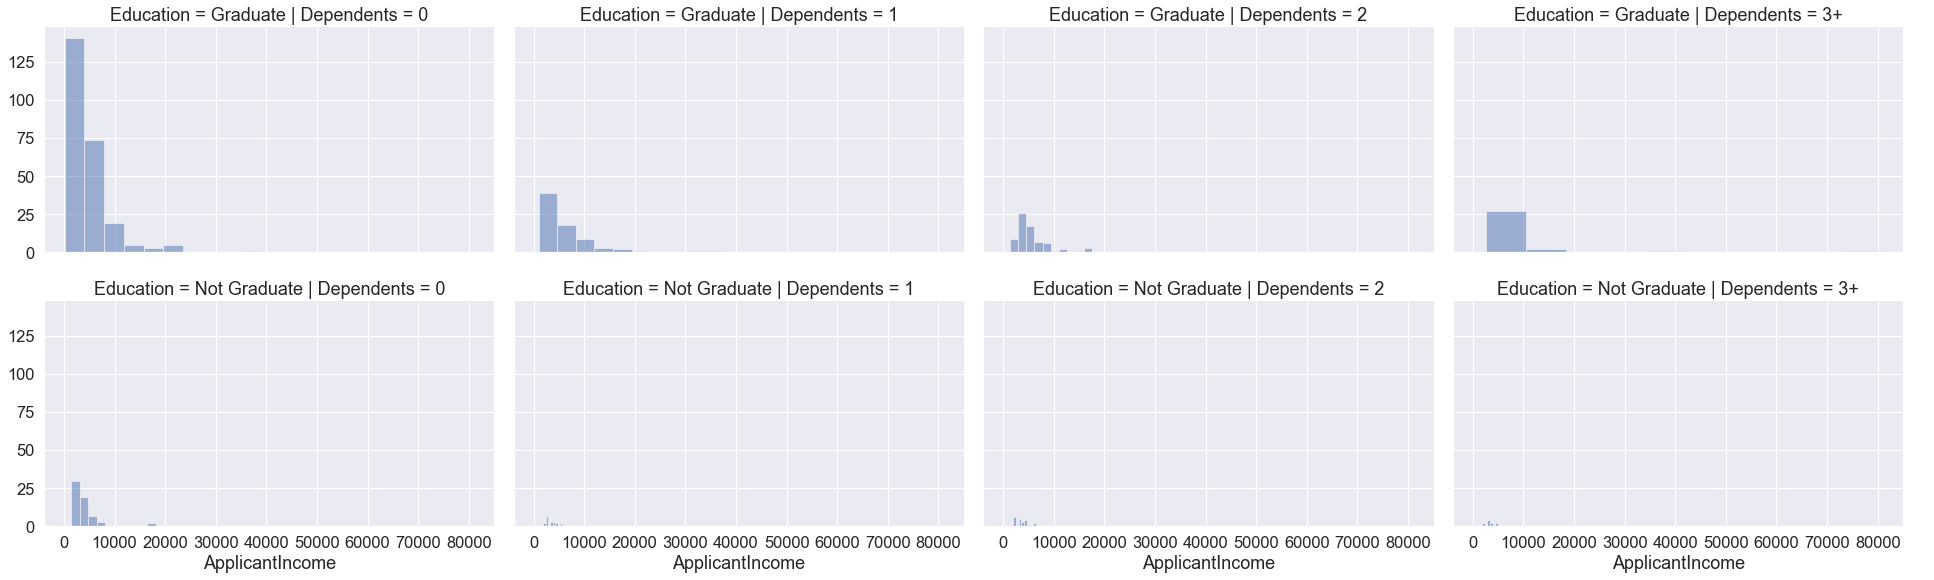

In [24]:
grid  = sns.FacetGrid(df, row='Education', col='Dependents', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

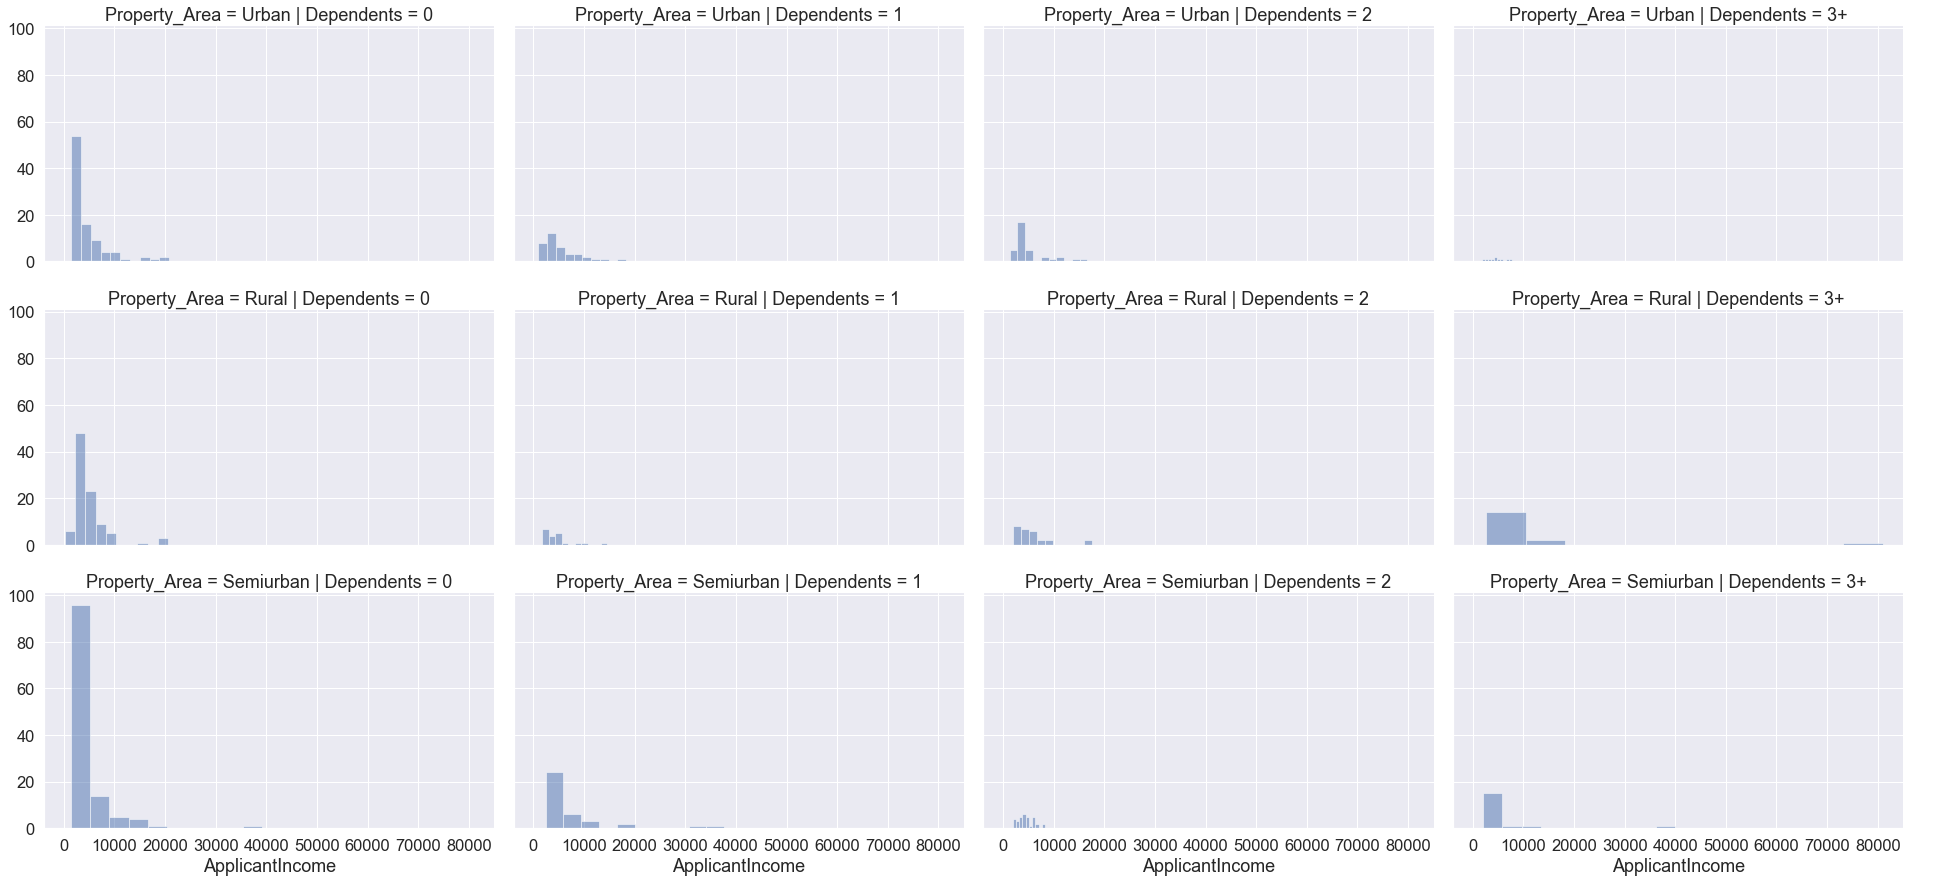

In [25]:
grid  = sns.FacetGrid(df, row='Property_Area', col='Dependents', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

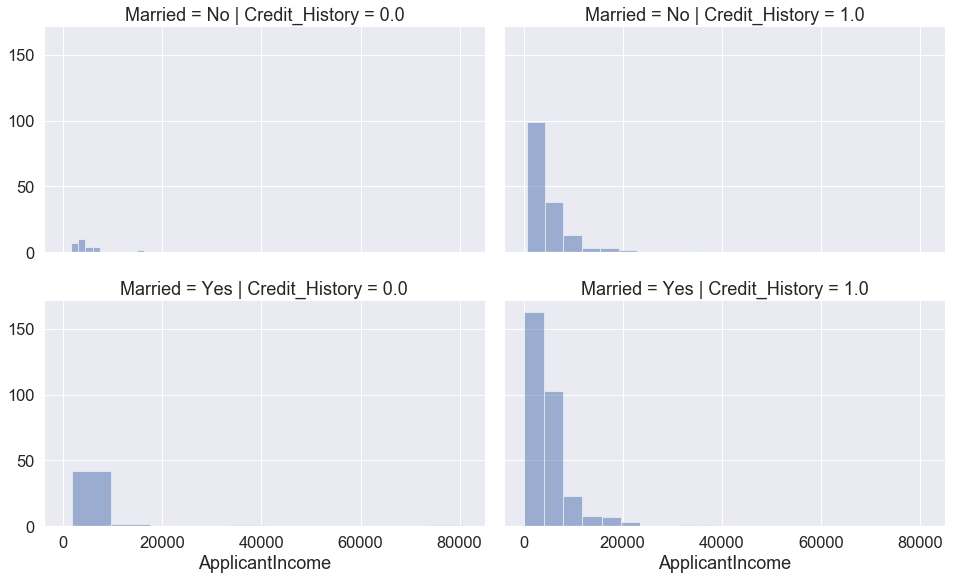

In [26]:
grid  = sns.FacetGrid(df, row='Married', col='Credit_History', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

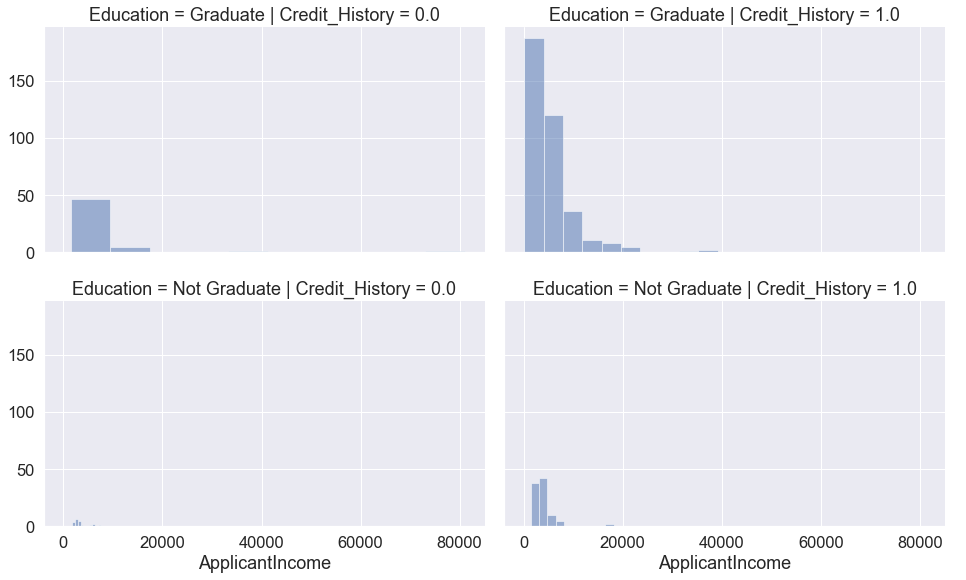

In [27]:
grid  = sns.FacetGrid(df, row='Education', col='Credit_History', size =4.2, aspect=1.6)

grid.map(plt.hist, 'ApplicantIncome', alpha=.5, bins =10)

grid.add_legend()

### Let's replace the Variable values to Numerical form & display the Value Counts



In [28]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [29]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [30]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [31]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [32]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
2     94
1     94
3     45
Name: Dependents, dtype: int64

In [33]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [34]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [35]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [36]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
53.000000      1
65.000000      1
109.000000     1
156.000000     1
89.000000      1
Name: LoanAmount, Length: 195, dtype: int64

In [37]:
df['Loan_Amount_Term'].value_counts()

360.0    464
180.0     38
480.0     13
300.0     12
84.0       4
240.0      3
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [38]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 542 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            542 non-null    object 
 1   Gender             542 non-null    int64  
 2   Married            542 non-null    int64  
 3   Dependents         542 non-null    int64  
 4   Education          542 non-null    int64  
 5   Self_Employed      542 non-null    int64  
 6   ApplicantIncome    542 non-null    int64  
 7   CoapplicantIncome  542 non-null    float64
 8   LoanAmount         542 non-null    float64
 9   Loan_Amount_Term   542 non-null    float64
 10  Credit_History     542 non-null    float64
 11  Property_Area      542 non-null    int64  
 12  Loan_Status        542 non-null    int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 79.3+ KB


# Correlation Matrix

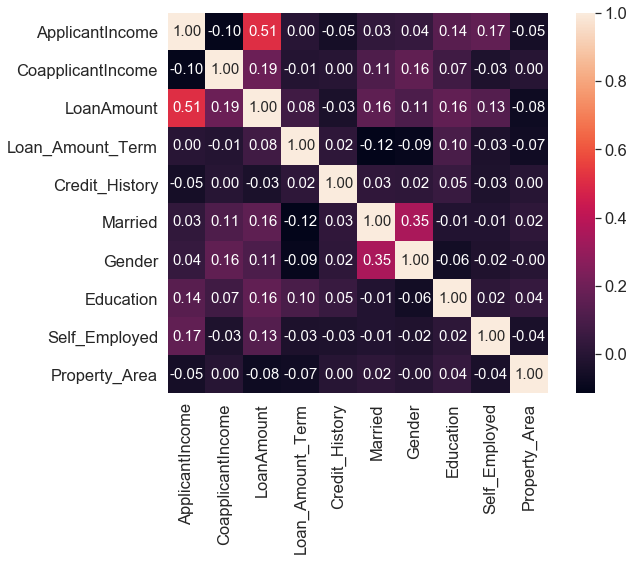

In [41]:
cols = ['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Married',
        'Gender','Education','Self_Employed','Property_Area']
f, ax = plt.subplots(figsize=(10, 7))
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.show()

### Final DataFrame

In [42]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


### Importing Packages for Classification algorithms

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


### Splitting the data into Train and Test set

In [44]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

### Logistic Regression (LR)

In [46]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [47]:
lr_prediction = model.predict(X_test)
print(lr_prediction)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]


In [48]:
evaluation = f1_score(y_test,lr_prediction)
print("the accuracy of logistic regreesion is:",evaluation)

the accuracy of logistic regreesion is: 0.8559670781893004


# Decision Tree

In [49]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [50]:
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [51]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0
 1 1 1 0 0 0 1 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 0 1
 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 0
 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0]


In [52]:
evaluation_tree = f1_score(y_test,y_pred)
print("the accuracy of decision tree is:",evaluation_tree)

the accuracy of decision tree is: 0.772093023255814


# Random Forest

In [53]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [54]:
ypred_forest = model.predict(X_test)
print(ypred_forest)

[1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 0 1 1 1 1 1 1 0 1 1 0]


In [55]:
evaluation_forest = f1_score(y_test, ypred_forest)
print("the accuracy of random forest classifier is:",evaluation_forest)

the accuracy of random forest classifier is: 0.8438818565400844
